In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from log_parser import LogParser

In [2]:
parser = LogParser()
# parser.format_lists()
df = parser.df

/mnt/d/Code/summer_research/hybrid-vector-clocks/hvc/LOGFILES/E1000.N32.I100.S5.L.log
/mnt/d/Code/summer_research/hybrid-vector-clocks/hvc/LOGFILES/E10000.N32.I100.S5.L.log
/mnt/d/Code/summer_research/hybrid-vector-clocks/hvc/LOGFILES/E11000.N32.I100.S5.L.log
/mnt/d/Code/summer_research/hybrid-vector-clocks/hvc/LOGFILES/E12000.N32.I100.S5.L.log
/mnt/d/Code/summer_research/hybrid-vector-clocks/hvc/LOGFILES/E13000.N32.I100.S5.L.log
/mnt/d/Code/summer_research/hybrid-vector-clocks/hvc/LOGFILES/E14000.N32.I100.S5.L.log
/mnt/d/Code/summer_research/hybrid-vector-clocks/hvc/LOGFILES/E15000.N32.I100.S5.L.log
/mnt/d/Code/summer_research/hybrid-vector-clocks/hvc/LOGFILES/E16000.N32.I100.S5.L.log
/mnt/d/Code/summer_research/hybrid-vector-clocks/hvc/LOGFILES/E17000.N32.I100.S5.L.log
/mnt/d/Code/summer_research/hybrid-vector-clocks/hvc/LOGFILES/E18000.N32.I100.S5.L.log
/mnt/d/Code/summer_research/hybrid-vector-clocks/hvc/LOGFILES/E19000.N32.I100.S5.L.log
/mnt/d/Code/summer_research/hybrid-vector-cl

In [3]:
df = df.sort_values(['time']).reset_index(drop = True)

In [4]:
prob_offsets = {}
prob_counters = {}

for offset in sorted(df['f.offset_size'].unique()):
    prob_offsets[offset] = len(df[df['f.offset_size'] == offset].index)/len(df.index)

for counter in sorted(df['f.counter_size'].unique()):
    prob_counters[counter] = len(df[df['f.counter_size'] == counter].index)/len(df.index)

/home/shaanzie/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


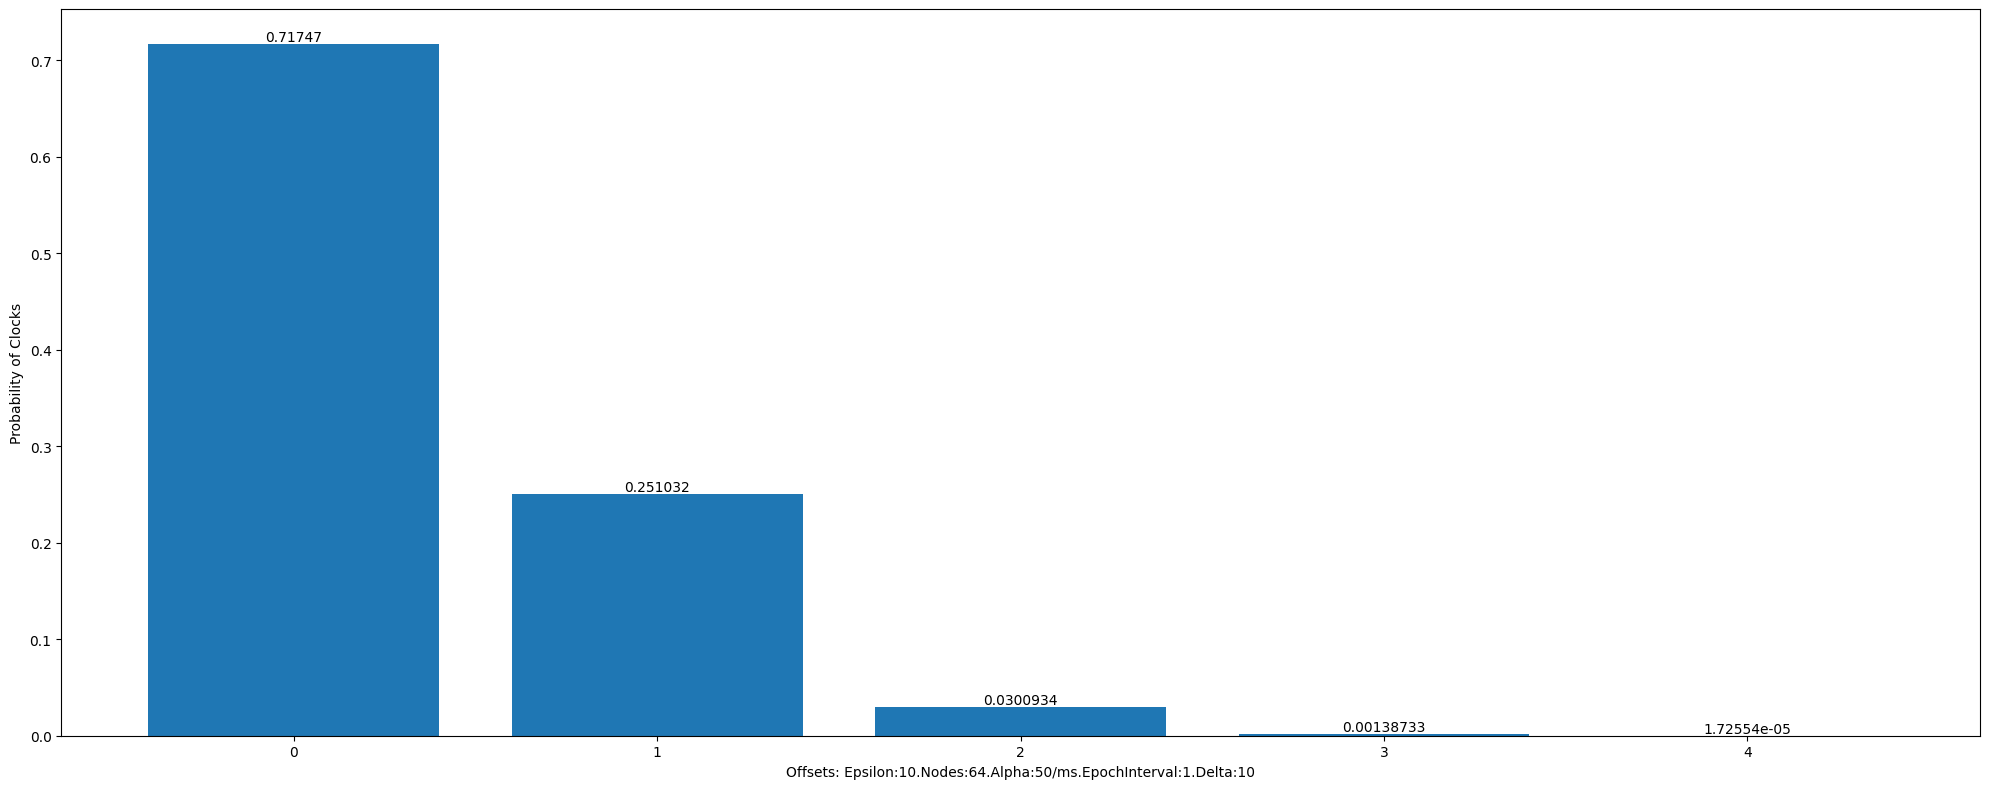

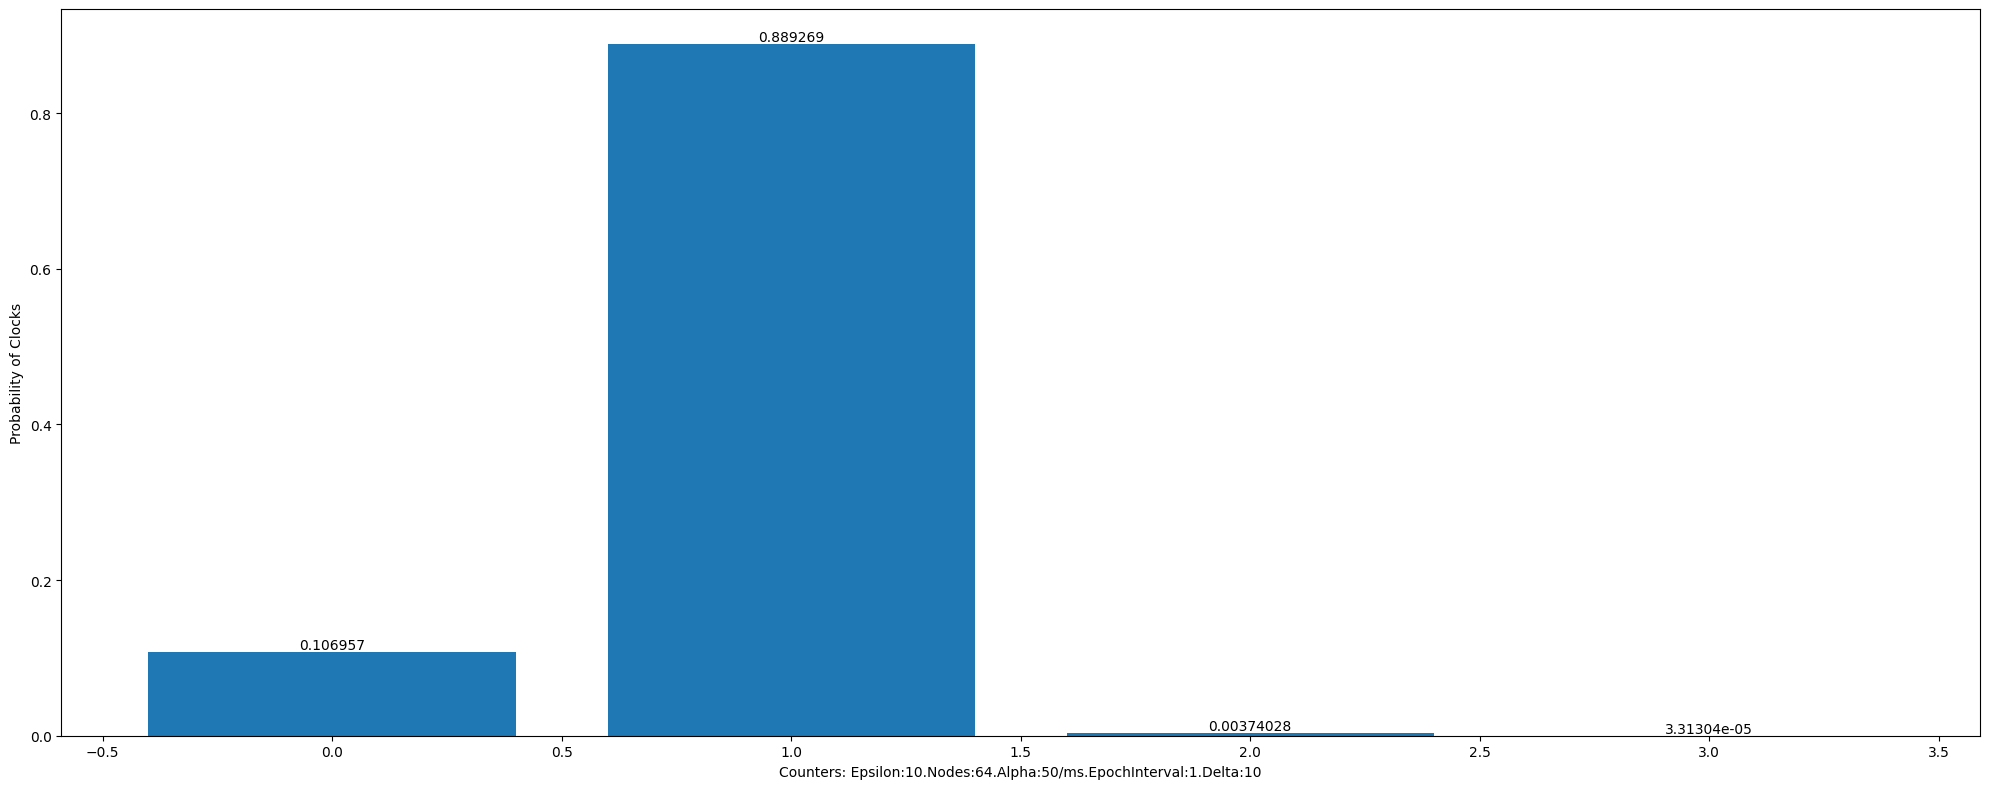

In [5]:
'''
Notes:
use_leader = False
threshold to tick = 0.5
Way to interpret graphs: With a 0.07 probability, we see a clock with offset size of 5
'''

plt.rcParams["figure.figsize"] = [20, 8]
plt.rcParams["figure.autolayout"] = True

bars = plt.bar(prob_offsets.keys(), prob_offsets.values())
plt.bar_label(bars)
plt.ylabel('Probability of Clocks')
plt.xlabel('Offsets: Epsilon:{E}.Nodes:{N}.Alpha:{A}/ms.EpochInterval:{I}.Delta:{D}'.format(E=df['epsilon'].unique()[0],
                                        N=df['num_nodes'].unique()[0],
                                        A=int(df['send_threshold'].unique()[0]*1000),
                                        I=df['interval'].unique()[0],
                                        D=df['delta'].unique()[0]))

plt.savefig('../imgs/Offsets_E{E}_N{N}_A{A}_I{I}_D{D}.png'.format(E=df['epsilon'].unique()[0],
                                        N=df['num_nodes'].unique()[0],
                                        A=int(df['send_threshold'].unique()[0]*1000),
                                        I=df['interval'].unique()[0],
                                        D=df['delta'].unique()[0]))
plt.show()


bars = plt.bar(prob_counters.keys(), prob_counters.values())
plt.bar_label(bars)
plt.ylabel('Probability of Clocks')
plt.xlabel('Counters: Epsilon:{E}.Nodes:{N}.Alpha:{A}/ms.EpochInterval:{I}.Delta:{D}'.format(E=df['epsilon'].unique()[0],
                                        N=df['num_nodes'].unique()[0],
                                        A=int(df['send_threshold'].unique()[0]*1000),
                                        I=df['interval'].unique()[0],
                                        D=df['delta'].unique()[0]))
plt.savefig('../imgs/Counters_E{E}_N{N}_A{A}_I{I}_D{D}.png'.format(E=df['epsilon'].unique()[0],
                                        N=df['num_nodes'].unique()[0],
                                        A=int(df['send_threshold'].unique()[0]*1000),
                                        I=df['interval'].unique()[0],
                                        D=df['delta'].unique()[0]))
plt.show()

In [4]:
df[df['epsilon'] == 10000].barplot(['f.offset_size'])

AttributeError: 'DataFrame' object has no attribute 'barplot'

<AxesSubplot: xlabel='epsilon', ylabel='HVC offset size'>

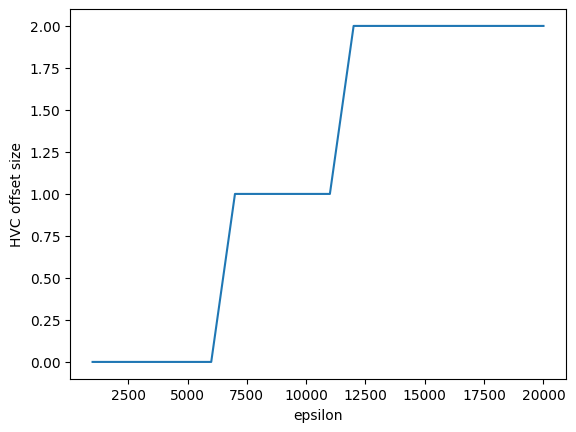

In [6]:
df.groupby(by = 'epsilon')['f.offset_size'].max().plot(ylabel = 'HVC offset size')

<AxesSubplot: xlabel='epsilon', ylabel='HVC counter size'>

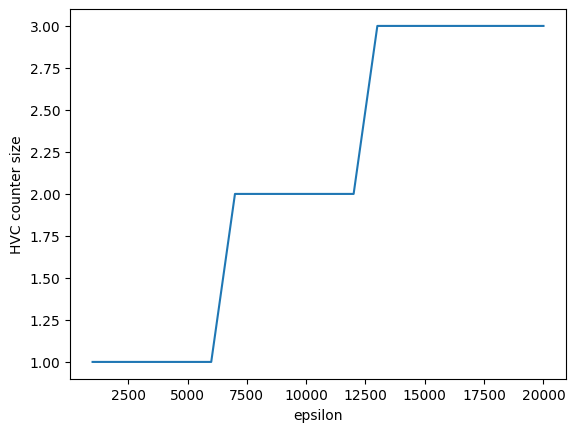

In [7]:
df.groupby(by = 'epsilon')['f.counter_size'].max().plot(ylabel = 'HVC counter size')

In [12]:
df[df['epsilon'] == 20000]['f.counters'].to_csv('counters.csv')